<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Joshua's_Rats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ortools
from ortools.sat.python import cp_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.2 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobu

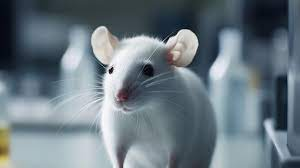

[Link](https://matmod.ch/blog/2024/02/12/joshuas-rats-math15/) to the original problem.

Joshua is a biologist. His project for this term is measuring the effects of an increase in vitamin C in the diet of 9 laboratory rats. Each rat will have a different diet supplement of 1 to 20 units. Fractions of a unit are not possible. To get the maximum value for his experiment, Joshua has decided that for any group of three rats the supplements should not be in arithmetic progression. In other words, for three rats chosen at random, the middle supplement should be different from the arithmetic middle of the biggest and the smallest supplement. Thus, if the biggest supplement is 12 and the smallest is 6, for example, the middle supplement should not be 9 (9 being the arithmetic middle of 12 and 6). Find a set of supplements that Joshua could use

In [76]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, x,z):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__x = x
        self.__z = z
        self.__solution_count = 0


    def on_solution_callback(self):
        self.__solution_count += 1

        print(self.__solution_count , [self.Value(self.__x[i]) for i in self.__x],\
             '\t0 in differences?: {0}'.format(0 in [self.Value(self.__z[i]) for i in self.__z]))

    def solution_count(self):
        return self.__solution_count

In [77]:
from math import comb
import itertools

def SearchForAllSolutionsSampleSat():

    n = 9
    m = 20

    # Creates the model and set solver
    model = cp_model.CpModel()
    solver = cp_model.CpSolver()

    x = {i:model.NewIntVar(1, m, f"x_{i}") for i in range(1,n+1)}
    y = {i:model.NewIntVar(-m, m, f"y_{i}") for i in range(1,comb(n,3)+1)}
    z = {i:model.NewIntVar(1, m, f"z_{i}") for i in range(1,comb(n,3)+1)}

    for i in range(1,n):
     model.Add(x[i] <= x[i+1])

    model.AddAllDifferent([x[i] for i in range(1,n+1)])

    # For any group of 3 rats the supplements should not be in arithmetic progression
    count = 1
    for i,j,k in list(itertools.combinations(range(1,n+1),3)):
      # Storing differences of any group of 3 rats
      model.Add(y[count] == (x[k] - x[j]) - (x[j] - x[i]))
      # Converting differences to absolute values of differences
      model.AddAbsEquality(z[count],y[count])
      # Constraining absolute values to positive integers
      model.Add(z[count] >= 1)
      count+=1

    # Enumerate all solutions.
    solver.parameters.enumerate_all_solutions = True

    solution_printer = VarArraySolutionPrinter(x,z)

    status = solver.Solve(model, solution_printer)

    print(f"Status = {solver.StatusName(status)}")

SearchForAllSolutionsSampleSat()

1 [1, 3, 6, 7, 12, 14, 15, 19, 20] 	0 in differences?: False
2 [1, 2, 6, 7, 9, 14, 15, 18, 20] 	0 in differences?: False
Status = OPTIMAL
